In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('../../datasets/House Price/train.csv')
df_test = pd.read_csv('../../datasets/House Price/test.csv')

In [3]:
na_valid = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [4]:
na_missing = set(df_test.columns) - set(na_valid)

In [5]:
dict1 = dict.fromkeys(na_missing, ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null'])
dict2 = dict.fromkeys(na_valid, ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a','nan', 'null'])
dict1.update(dict2)
len(dict1)

80

In [6]:
df_train = pd.read_csv('../../datasets/House Price/train.csv',
                       keep_default_na=False, na_values=dict1)
df_test = pd.read_csv('../../datasets/House Price/train.csv',
                      keep_default_na=False, na_values=dict1)

In [7]:
df_train.shape

(1460, 81)

In [8]:
num_columns = df_train.select_dtypes(include=[np.number])
obj_columns = df_train.select_dtypes(exclude=[np.number])

In [9]:
len(obj_columns + num_columns)

1460

In [10]:
cat_cols = list(df_test.select_dtypes(include='object').columns)
num_cols = list(df_test.select_dtypes(exclude='object').columns)
len(cat_cols + num_cols)

81

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [13]:
cat_imputer.fit(df_train[cat_cols])
num_imputer.fit(df_train[num_cols])

SimpleImputer(strategy='median')

In [14]:
df_train[cat_cols] = cat_imputer.transform(df_train[cat_cols])
df_test[cat_cols] = cat_imputer.transform(df_test[cat_cols])

df_train[num_cols] = num_imputer.transform(df_train[num_cols])
df_test[num_cols] = num_imputer.transform(df_test[num_cols])

In [15]:
import matplotlib.pyplot as plt

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

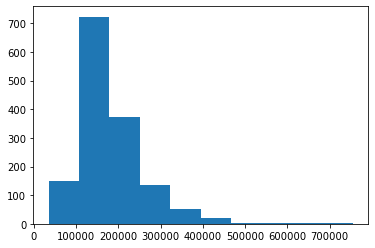

In [16]:
plt.hist(df_train['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9ccefafa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9ccf0e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9ccefacd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9ccf0eb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9ccf0edf0>],
 'means': []}

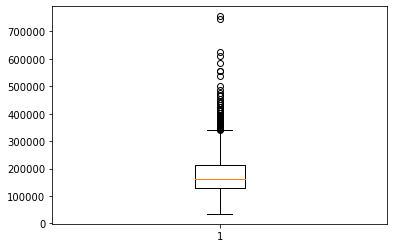

In [17]:
plt.boxplot(df_train['SalePrice'])

In [18]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Binning

In [19]:
# Year built

def get_year_built(year):
    if year<1925:
        return 'FS'
    if year<1950:
        return 'SS'
    if year<1975:
        return 'TS'
    return 'QS'

In [20]:
df_train['YearBuilt'] = df_train['YearBuilt'].apply(get_year_built)
df_test['YearBuilt'] = df_test['YearBuilt'].apply(get_year_built)

In [21]:
# yr sold
def get_year_sold(year):
    if year<2010:
        return 'PA'
    if year<2009:
        return 'QA'
    if year<2008:
        return 'TA'
    if year<2007:
        return 'SA'
    return 'FA'

In [22]:
df_train['YrSold'] = df_train['YrSold'].apply(get_year_sold)
df_test['YrSold'] = df_test['YrSold'].apply(get_year_sold)

# Encoding

In [23]:
temp = df_train['Id']
dummy = pd.get_dummies(df_train[cat_cols],prefix=cat_cols)

In [24]:
df_train.shape

(1460, 81)

In [25]:
dummy

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [26]:
dummy.shape

(1460, 266)

In [27]:
df_train.drop(cat_cols,axis=1,inplace=True)

In [28]:
df_train_final = pd.concat([df_train,dummy],axis=1)

In [29]:
dummy.shape

(1460, 266)

In [30]:
df_train_final.shape

(1460, 304)

In [31]:
dummy1 = pd.get_dummies(df_test[cat_cols],prefix=cat_cols)

In [32]:
df_train_test = pd.concat([df_train.drop('SalePrice',axis=1),df_test],axis=0)

In [ ]:
df_train_test[cat_cols] = cat_imputer.transform(df_train_test[cat_cols])
df_train_test[num_cols] = num_imputer.transform(df_train_test[num_cols])